In [1]:
from random import choice
import matplotlib.pyplot as plt

In [2]:
from IPython.display import clear_output
#displaying board
def display_board(board):
    clear_output()
    b = []
    for i in board:
        if i == - 1:
            b.append("A")
        if i ==1:
            b.append("H")
        if i == 0:
            b.append(" ")
    print('   |   |')
    print('  0| 1 |2')
    print('   |   |')
    print(' ' + b[0] + ' | ' + b[1] + ' | ' + b[2])
    print('   |   |')
    print('-----------')
    print('   |   |')
    print('  3| 4 |5')
    print('   |   |')
    print(' ' + b[3] + ' | ' + b[4] + ' | ' + b[5])
    print('   |   |')
    print('-----------')
    print('   |   |')
    print('  6| 7 |8')
    print('   |   |')
    print(' ' + b[6] + ' | ' + b[7] + ' | ' + b[8])
    print('   |   |')
    print('***********')

In [3]:
display_board([-1,-1,-1,
              0,0,0,
              1,1,1])

   |   |
  0| 1 |2
   |   |
 A | A | A
   |   |
-----------
   |   |
  3| 4 |5
   |   |
   |   |  
   |   |
-----------
   |   |
  6| 7 |8
   |   |
 H | H | H
   |   |
***********


In [4]:
#positions of H,A
def positions(board):
    position_of_H = [i for i in range(9) if board[i]==1]
    position_of_A = [i for i in range(9) if board[i]==-1]
    return  position_of_H,position_of_A

In [5]:
#available moves for Human
def available_moves_H(board):
    available_moves = []
    x,_ = positions(board)
    if 8 in x:
        if board[5] == 0:
            available_moves.append("8->5")
        if board[4] == -1:
            available_moves.append("8->4")
    if 7 in x:
        if board[4]==0 :
            available_moves.append("7->4")
        if board[3]==-1:
            available_moves.append("7->3")
        if board[5]== -1:
            available_moves.append("7->5")
    if 6 in x:
        if board[3] == 0 :
            available_moves.append("6->3")
        if board[4] == -1:
            available_moves.append("6->4")
    if 5 in x:
        if board[2] == 0:
            available_moves.append("5->2")
        if board[1] == -1:
            available_moves.append("5->1")
    if 4 in x:
        if board[1]==0 :
            available_moves.append("4->1")
        if board[0]==-1:
            available_moves.append("4->0")
        if board[2]== -1:
            available_moves.append("4->2")
    if 3 in x:
        if board[0] == 0 :
            available_moves.append("3->0")
        if board[1] == -1:
            available_moves.append("3->1")
    return available_moves

In [6]:
#available_moves_by_AI
def available_moves_A(board):
    available_moves = []
    _,x = positions(board)
    if 0 in x:
        if board[3] == 0:
            available_moves.append("0->3")
        if board[4] == 1:
            available_moves.append("0->4")
    if 1 in x:
        if board[4]==0 :
            available_moves.append("1->4")
        if board[3]==1:
            available_moves.append("1->3")
        if board[5]== 1:
            available_moves.append("1->5")
    if 2 in x:
        if board[5] == 0 :
            available_moves.append("2->5")
        if board[4] == 1:
            available_moves.append("2->4")
    if 3 in x:
        if board[6] == 0:
            available_moves.append("3->6")
        if board[7] == 1:
            available_moves.append("3->7")
    if 4 in x:
        if board[7]==0 :
            available_moves.append("4->7")
        if board[6]==1:
            available_moves.append("4->6")
        if board[8]== 1:
            available_moves.append("4->8")
    if 5 in x:
        if board[8] == 0 :
            available_moves.append("5->8")
        if board[7] == 1:
            available_moves.append("5->7")
    return available_moves

In [7]:
#winning condition
def check_win(board):
    #if H reaches the other end
    if 1 in [board[0],board[1],board[2]]:
        return 1
    #if A reaches the other end
    if -1 in [board[6],board[7],board[8]]:
        return 1
    position_of_H,position_of_A = positions(board)
      # if H got elemented completely
    if len(position_of_H) == 0:
        return 1
    #if A got elemented completely
    if len(position_of_A) == 0:
        return 1
    #if there are no moves for H
    if len(available_moves_H(board)) ==0:
        return 1
    #if there are no moves for A
    if len(available_moves_A(board)) ==0:
        return 1
    
    return 0 

In [8]:
#updating move by human
def update_move_H(board,move):
    board[int(move[0])] = 0 
    board[int(move[-1])] = 1
    return board
def update_move_A(board,move):
    board[int(move[0])] = 0
    board[int(move[-1])] = -1
    return board

In [9]:
#getting possible board positions at 2nd 4th 6th move of AI
win_count = []
memory_A_2 = []
memory_A_4 = []
memory_A_6 = []
for _ in range(5000):
    game = [-1,-1,-1,
              0,0,0,
              1,1,1]
    #1st move by Human
    a = available_moves_H(game.copy())
    b = choice(range(len(a)))
    game = update_move_H(game.copy(),a[b])
    #2nd move by AI
    if game.copy() not in [p[0] for p in memory_A_2]:
        memory_A_2.append([game.copy(),available_moves_A(game.copy())])
    d = available_moves_A(game.copy())
    e = choice(range(len(d)))
    game = update_move_A(game.copy(),d[e])
    #3rd move by Human
    f = available_moves_H(game.copy())
    g = choice(range(len(f)))
    game = update_move_H(game.copy(),f[g])
    if check_win(game)==1:
        win_count.append("H")
        continue
    #4th move by AI
    if game.copy() not in [p[0] for p in memory_A_4]:
        memory_A_4.append([game.copy(),available_moves_A(game.copy())])
    h = available_moves_A(game.copy())
    i = choice(range(len(h)))
    game = update_move_A(game.copy(),h[i])
    if check_win(game)==1:
        win_count.append("A")
        continue
    #5th move by Human
    j = available_moves_H(game.copy())
    k = choice(range(len(j)))
    game = update_move_H(game.copy(),j[k])
    if check_win(game)==1:
        win_count.append("H")
        continue
    #6th move by AI
    if game.copy() not in [p[0] for p in memory_A_6]:
        memory_A_6.append([game.copy(),available_moves_A(game.copy())])
    l = available_moves_A(game.copy())
    m = choice(range(len(l)))
    game = update_move_A(game.copy(),l[m])
    if check_win(game)==1:
        win_count.append("H")
        continue
    #7th move by Human
    n = available_moves_H(game.copy())
    o = choice(range(len(n)))
    game = update_move_H(game.copy(),n[o])
    if check_win(game)==1:
        win_count.append("H")
        continue

In [10]:
memory_A_2

[[[-1, -1, -1, 0, 0, 1, 1, 1, 0], ['0->3', '1->4', '1->5']],
 [[-1, -1, -1, 0, 1, 0, 1, 0, 1], ['0->3', '0->4', '2->5', '2->4']],
 [[-1, -1, -1, 1, 0, 0, 0, 1, 1], ['1->4', '1->3', '2->5']]]

['H', 'H', 'A', 'A', 'H', 'H', 'H', 'H', 'H', 'A', 'A', 'A', 'A', 'A', 'A', 'H', 'H', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'H', 'A', 'H', 'H', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'A', 'A',

(array([ 17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 983.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

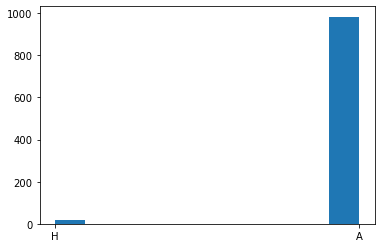

In [11]:
#learning
#random vs AI
win_count  = []
for _ in range(1000):
    while True:
        game = [-1,-1,-1,
                  0,0,0,
                  1,1,1]
        #display_board(game)
        #1st move by Human
        a = available_moves_H(game.copy())
        #b = int(input(f"Choose one available_moves:{a}"))
        b = choice(range(len(a)))
        game = update_move_H(game.copy(),a[b])
        #display_board(game)
        #2nd move by AI
        for t in memory_A_2:
            if t[0]== game.copy():
                d = t[1]
                e = choice(range(len(d)))
                break
        move_2 = [game.copy(),d[e]]
        game = update_move_A(game.copy(),d[e])
        #display_board(game)
        #3rd move by Human
        f = available_moves_H(game.copy())
        #g = int(input(f"Choose one available_moves:{f}"))
        g = choice(range(len(f)))
        game = update_move_H(game.copy(),f[g])
        #display_board(game)
        if check_win(game)==1:
            win_count.append("H")
            for x in memory_A_2:
                if x[0]==move_2[0]:
                    x[1].remove(move_2[1])   
                    break
            break
        #4th move by AI
        for t in memory_A_4:
            if t[0]== game.copy():
                h = t[1]
                i = choice(range(len(h)))
                break
        move_4 = [game.copy(),h[i]]
        game = update_move_A(game.copy(),h[i])
        #display_board(game)
        if check_win(game)==1:
            win_count.append("A")
            for x in memory_A_4:
                if x[0] == move_4[0]:
                    x[1] = [move_4[1]]
            break
        #5th move by Human
        j = available_moves_H(game.copy())
        #k = int(input(f"Choose one available_moves:{j}"))
        k = choice(range(len(j)))
        game = update_move_H(game.copy(),j[k])
        #display_board(game)
        if check_win(game)==1:
            win_count.append("H")
            for y in memory_A_4:
                if y[0]==move_4[0]:
                    y[1].remove(move_4[1])
                    break
            break
        #6th move by AI
        for t in memory_A_6:
            if t[0]== game.copy():
                l = t[1]
                m = choice(range(len(l)))
                break
        move_6 = [game.copy(),l[m]]
        game = update_move_A(game.copy(),l[m])
        #display_board(game)
        if check_win(game)==1:
            win_count.append("A")
            for p in memory_A_6:
                if p[0]==move_6[0]:
                    p[1] = [move_6[1]]
            break
        #7th move by Human
        n = available_moves_H(game.copy())
        #o = int(input(f"Choose one available_moves:{n}"))
        o = choice(range(len(n)))
        game = update_move_H(game.copy(),n[o])
        #display_board(game)
        if check_win(game)==1:
            win_count.append("H")
            for z in memory_A_6:
                if z[0]==move_6[0]:
                    z[1].remove(move_6[1])
                    b
            break
print(win_count)
plt.hist(win_count)

In [14]:
memory_A_2

[[[-1, -1, -1, 0, 0, 1, 1, 1, 0], ['1->5']],
 [[-1, -1, -1, 0, 1, 0, 1, 0, 1], ['0->4', '2->4']],
 [[-1, -1, -1, 1, 0, 0, 0, 1, 1], ['1->3']]]

In [ ]:
#player vs AI
win_count  = []
for _ in range(5):
    while True:
        game = [-1,-1,-1,
                  0,0,0,
                  1,1,1]
        display_board(game)
        #1st move by Human
        a = available_moves_H(game.copy())
        b = int(input(f"Choose one available_moves:{a}"))
        #b = choice(range(len(a)))
        game = update_move_H(game.copy(),a[b])
        display_board(game)
        #2nd move by AI
        for t in memory_A_2:
            if t[0]== game.copy():
                d = t[1]
                e = choice(range(len(d)))
                break
        move_2 = [game.copy(),d[e]]
        game = update_move_A(game.copy(),d[e])
        display_board(game)
        #3rd move by Human
        f = available_moves_H(game.copy())
        g = int(input(f"Choose one available_moves:{f}"))
        #g = choice(range(len(f)))
        game = update_move_H(game.copy(),f[g])
        display_board(game)
        if check_win(game)==1:
            win_count.append("H")
            print("Human Won")
            for x in memory_A_2:
                if x[0]==move_2[0]:
                    x[1].remove(move_2[1])   
                    break
            break
        #4th move by AI
        for t in memory_A_4:
            if t[0]== game.copy():
                h = t[1]
                i = choice(range(len(h)))
                break
        move_4 = [game.copy(),h[i]]
        game = update_move_A(game.copy(),h[i])
        display_board(game)
        if check_win(game)==1:
            win_count.append("A")
            print("AI won")
            for x in memory_A_4:
                if x[0] == move_4[0]:
                    x[1] = [move_4[1]]
            break
        #5th move by Human
        j = available_moves_H(game.copy())
        k = int(input(f"Choose one available_moves:{j}"))
        #k = choice(range(len(j)))
        game = update_move_H(game.copy(),j[k])
        display_board(game)
        if check_win(game)==1:
            win_count.append("H")
            print("Human Won")
            for y in memory_A_4:
                if y[0]==move_4[0]:
                    y[1].remove(move_4[1])
                    break
            break
        #6th move by AI
        for t in memory_A_6:
            if t[0]== game.copy():
                l = t[1]
                m = choice(range(len(l)))
                break
        move_6 = [game.copy(),l[m]]
        game = update_move_A(game.copy(),l[m])
        display_board(game)
        if check_win(game)==1:
            win_count.append("A")
            print("AI WON")
            for p in memory_A_6:
                if p[0]==move_6[0]:
                    p[1] = [move_6[1]]
            break
        #7th move by Human
        n = available_moves_H(game.copy())
        o = int(input(f"Choose one available_moves:{n}"))
        #o = choice(range(len(n)))
        game = update_move_H(game.copy(),n[o])
        display_board(game)
        if check_win(game)==1:
            win_count.append("H")
            print("Human Won")
            for z in memory_A_6:
                if z[0]==move_6[0]:
                    z[1].remove(move_6[1])
                    b
            break
print(win_count)
plt.hist(win_count)

   |   |
  0| 1 |2
   |   |
 A | A | A
   |   |
-----------
   |   |
  3| 4 |5
   |   |
   |   |  
   |   |
-----------
   |   |
  6| 7 |8
   |   |
 H | H | H
   |   |
***********


In [ ]:
memory_A_2

In [ ]:
memory_A_6

In [ ]:
memory_A_4